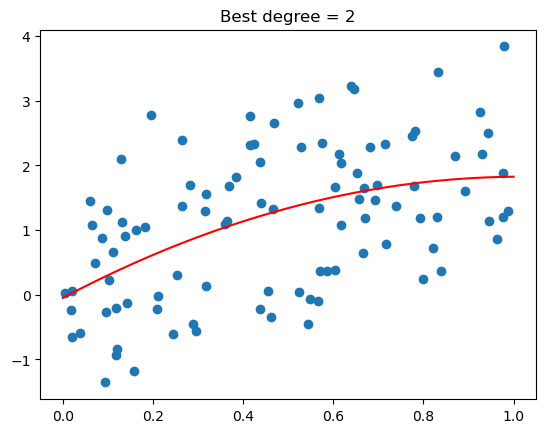

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate some data
np.random.seed(0) # Set random seed for reproducibility
n_samples = 100 # Number of samples to generate
X = np.random.rand(n_samples, 1) # Generate input data
y = 2*X[:,0] + np.random.randn(n_samples) # Generate output data with noise

# Define number of folds
K = 5

# Define a list of polynomial degrees to try
degrees = range(1, 11)

# Split the data into K folds
N = len(X) # Total number of samples
fold_indices = np.array_split(np.arange(N), K) # Split the indices into K folds

# Initialize list to store mean squared error for each degree
mean_mse = []

# Loop over each degree
for degree in degrees:
    mse = 0
    
    # Loop over each fold
    for i, fold in enumerate(fold_indices):
        # Get the training and validation data for this fold
        X_train = np.delete(X, fold, axis=0) # Get input training data
        y_train = np.delete(y, fold, axis=0) # Get output training data
        X_val = X[fold] # Get input validation data
        y_val = y[fold] # Get output validation data

        # Fit a polynomial regression model
        model = LinearRegression() # Create linear regression model
        model.fit(np.vander(X_train[:,0], degree+1), y_train) # Fit the polynomial model

        # Calculate the mean squared error on the validation set
        y_val_pred = model.predict(np.vander(X_val[:,0], degree+1)) # Predict output for validation data
        mse += mean_squared_error(y_val, y_val_pred) # Calculate MSE for this fold
    
    # Calculate the mean mse for this degree
    mean_mse.append(mse / K)

# Find the degree with the lowest mean squared error
best_degree = degrees[np.argmin(mean_mse)]

# Fit a polynomial regression model with the best degree on the entire dataset
model = LinearRegression() # Create linear regression model
model.fit(np.vander(X[:,0], best_degree+1), y) # Fit the polynomial model with the best degree

# Plot the results
X_plot = np.linspace(0, 1, 100)[:, None] # Generate input data for plotting
y_plot = model.predict(np.vander(X_plot[:,0], best_degree+1)) # Predict output data for plotting

plt.scatter(X, y) # Plot the original data points
plt.plot(X_plot, y_plot, color='red') # Plot the fitted polynomial curve
plt.title(f"Best degree = {best_degree}") # Add title to plot
plt.show() # Show the plot